In [38]:
class Input:
    def __init__(self, idx):
        with open(f"../tools/in/{idx}.txt") as f:
            T, H, W, i0 = map(int, f.readline().split())
            Hs = [list(map(int, f.readline().rstrip())) for _ in range(H-1)]
            Vs = [list(map(int, f.readline().rstrip())) for _ in range(H)]
            K = int(f.readline())
            SDs = [list(map(lambda x: int(x)-1, f.readline().split())) for _ in range(K)]
        self.Hs = Hs
        self.Vs = Vs
        self.i0 = i0*20
        self.g = [[] for _ in range(H*W)]
        for i in range(H-1):
            for j in range(W):
                if Hs[i][j]==0:
                    self.g[i*W+j].append(i*W+j+W)
                    self.g[i*W+j+W].append(i*W+j)
        for i in range(H):
            for j in range(W-1):
                if Vs[i][j]==0:
                    self.g[i*W+j].append(i*W+j+1)
                    self.g[i*W+j+1].append(i*W+j)
        self.SDs = SDs

class Output:
    def __init__(self, idx):
        with open(f"../tools/out/{idx}.txt") as f:
            m = int(f.readline())
            kijs = [list(map(int, f.readline().split())) for _ in range(m)]
        self.skp = []
        self.k2ps = [None]*100000
        self.p2ks = [[] for _ in range(20*20)]
        self.s2pk = [[] for _ in range(100)]
        for k, i, j, s in kijs:
            self.skp.append((s-1, k-1, i*20+j))
            self.k2ps[k-1] = (i*20+j, s-1)
            self.p2ks[i*20+j].append((k-1, s-1))
            self.s2pk[s-1].append((i*20+j, k-1))


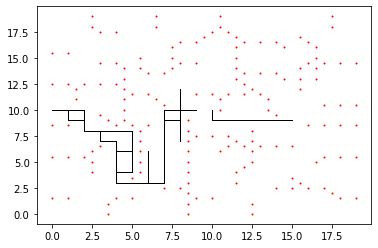

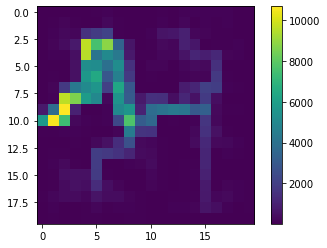

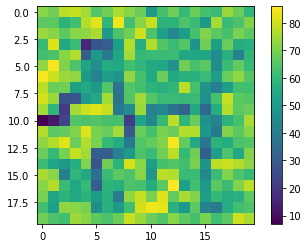

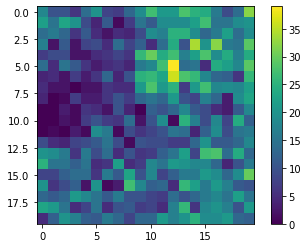

[9, 32, 36, 33, 30, 57, 110, 41, 10, 15, 33, 64, 14, 113, 93, 96, 97, 103, 40, 14]
[5, 50, 129, 79, 11, 32, 246, 51, 16, 10, 25, 116, 21, 192, 45, 107, 67, 104, 30, 6]
[22, 93, 252, 207, 1510, 1860, 2159, 70, 24, 31, 99, 553, 659, 926, 188, 163, 74, 60, 16, 6]
[27, 127, 371, 732, 9644, 7572, 8834, 3359, 590, 42, 82, 278, 182, 944, 646, 6, 77, 81, 111, 32]
[43, 107, 88, 459, 9538, 4129, 5088, 4315, 712, 46, 75, 202, 172, 557, 1117, 909, 1197, 161, 122, 32]
[7, 15, 17, 461, 5297, 5193, 3961, 5183, 1530, 41, 139, 170, 24, 171, 314, 271, 1504, 9, 14, 6]
[13, 57, 26, 459, 5658, 6451, 2893, 4664, 1783, 25, 76, 7, 5, 113, 152, 164, 1773, 46, 32, 14]
[34, 140, 1765, 4311, 5105, 5588, 2017, 6340, 2950, 9, 40, 5, 6, 811, 1128, 2028, 1935, 96, 76, 36]
[12, 121, 9620, 8606, 5875, 4999, 248, 5470, 3071, 738, 1469, 1442, 383, 1163, 520, 1832, 388, 26, 19, 7]
[742, 3774, 10682, 965, 9, 35, 91, 5071, 5568, 1014, 3816, 4082, 4335, 4215, 2975, 3264, 286, 82, 60, 25]
[5716, 10557, 7373, 216, 87, 50, 93, 

In [79]:
import matplotlib.pyplot as plt
import heapq

def visualize(idx):
    input_info = Input(idx)
    output_info = Output(idx)
    invalids = [-1]*400
    used_cnt = [[0]*400 for _ in range(400)]
    used_cnt2 = [0]*400
    used_cnt3 = [0]*400
    X_cnt = [0]*400
    invalids_X_cnt = [0]*400
    used = []
    event = [[] for _ in range(200)]
    for s, k, p in output_info.skp:
        event[s*2].append((k, p))
    for turn in range(200):
        # 経路なぞる
        for k, p in event[turn]:
            # i0から始めて,pまで行く
            pres = [None]*400
            appeared = [False]*400
            q = [(0, input_info.i0, None)]
            while q:
                _, x, pre = heapq.heappop(q)
                if appeared[x]:
                    continue
                appeared[x] = True
                pres[x] = pre
                if x==p:
                    break
                for y in input_info.g[x]:
                    if appeared[y] or invalids[y]>turn:
                        continue
                    heapq.heappush(q, (-used_cnt2[x], y, x))
            cur = p
            while cur!=input_info.i0:
                used_cnt[pres[cur]][cur] += 1
                used_cnt[cur][pres[cur]] += 1
                used_cnt2[cur] += 1
                used_cnt2[pres[cur]] += 1
                cur = pres[cur]
        # 埋める
        if turn%2==0:
            # invalidsの更新
            for k, p in event[turn]:
                s_, d = input_info.SDs[k]
                invalids_X_cnt[p] += s_-turn/2
                X_cnt[p] += d-s_
                invalids[p] = d*2+1
                event[d*2+1].append((k, p))
                used_cnt3[p] += 1
    max_cnt = max(used_cnt[input_info.i0])
    for idx1 in range(400):
        for idx2 in input_info.g[idx1]:
            if used_cnt[idx1][idx2]==0:
                continue
            i1, ji = idx1//20, idx1%20
            i2, jj = idx2//20, idx2%20
            plt.plot([ji, jj], [i1, i2], color="black", lw=(used_cnt[idx1][idx2]>max_cnt/5)**0.25)
    for i in range(20-1):
        for j in range(20):
            if input_info.Hs[i][j]==1:
                plt.scatter([j], [i+0.5], color="red", s=1)
    for i in range(20):
        for j in range(20-1):
            if input_info.Vs[i][j]==1:
                plt.scatter([j+0.5], [i], color="red", s=1)
    plt.show()

    plt.imshow([[used_cnt2[i*20+j] for j in range(20)] for i in range(20)])
    plt.colorbar()
    plt.show()
    plt.imshow([[X_cnt[i*20+j] for j in range(20)] for i in range(20)])
    plt.colorbar()
    plt.show()
    plt.imshow([[invalids_X_cnt[i*20+j] for j in range(20)] for i in range(20)])
    plt.colorbar()
    plt.show()
    for x in range(20):
        print([x-y for x, y in zip(used_cnt2[x*20:x*20+20], used_cnt3[x*20:x*20+20])])

    for x in range(20):
        print([y for x, y in zip(used_cnt2[x*20:x*20+20], used_cnt3[x*20:x*20+20])])


visualize("0000 copy")

4978 4411 52767 37983


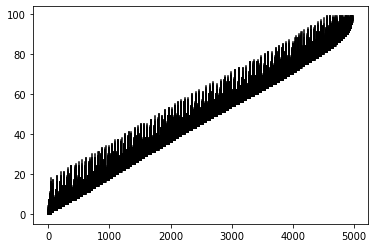

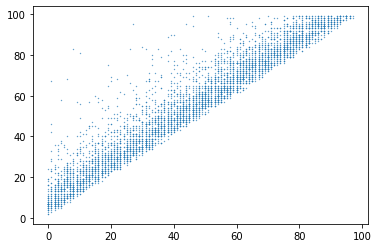

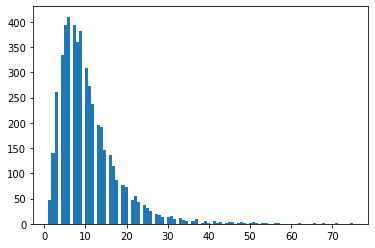

In [96]:
import matplotlib.pyplot as plt
import heapq

def visualize2(idx):
    input_info = Input(idx)
    output_info = Output(idx)
    sd = sorted(input_info.SDs)
    cnt1 = 0
    cnt2 = 0
    cnt3 = 0
    cnt4 = 0
    for i, (s, d) in enumerate(sd):
        cnt1 += 1
        cnt3 += d-s
        if d-s>18:
            continue
        cnt2 += 1
        cnt4 += d-s
        plt.plot([i, i], [s, d], color="black")
    print(cnt1, cnt2, cnt3, cnt4)
    plt.show()
    plt.scatter([s for s, d in sd], [d for s, d in sd], s=0.1)
    plt.show()
    plt.hist([d-s for s, d in sd], bins=100)

visualize2('0000 copy')

In [97]:
input_info = Input("0000 copy")
input_info.SDs[53-1]

[13, 15]